In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [29]:
combined_df = pd.read_csv('galleria.csv')
combined_df.head()

,SaleDate,TicketNo,Outlet,Total,OrderQty,Stock_Code,Name,Description,Price,Product_Group,Group_name,CardType
0,21/08/2018,92208,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Visa
1,21/08/2018,92209,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis
2,21/08/2018,92211,Middlesborough,7.5,1,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",7.5,C,Crepes and Galettes,Visa
3,21/08/2018,92217,Birmingham,5.0,1,BK0101,Eggs Florentine,NaN,5.0,B,Breakfast,Avis
4,21/08/2018,92217,Birmingham,7.5,1,CP0125,The Sicilian Crepe,"Tuna, black olives, cheddar cheese, spinach an...",7.5,C,Crepes and Galettes,Avis


In [68]:
print('the number of the duplicated rows in the dataset:',combined_df.duplicated().sum()
     )

the number of the duplicated rows in the dataset: 0


In [66]:
print('shape of the data set:', combined_df.shape)

shape of the data set: (40705, 12)


In [64]:
print('Number of items in the data set:',combined_df.size)

Number of items in the data set: 488460


In [63]:
print('name of the Features in the dataset: ',df.columns)

name of the Features in the dataset:  Index(['SaleDate', 'TicketNo', 'Outlet', 'Total', 'OrderQty', 'Stock_Code',
       'Name', 'Description', 'Price', 'Product_Group', 'Group_name',
       'CardType'],
      dtype='object')


In [30]:
total_columns = combined_df.columns
# store numerical and categorical column in two different variables. It comes handy during visualizaion.
num_col = combined_df._get_numeric_data().columns
cat_col = list(set(total_columns)-set(num_col))

# Plotting describe() function
Pandas describe() function computes percentile, mean, std, count, and IQR values of a data frame or a series of numeric values.

In [60]:
combined_df.describe()

,TicketNo,Total,OrderQty,Price
count,40705.000000,40705.000000,40705.000000,40705.000000
mean,92232.059526,18.237716,2.462769,7.590910
std,9052.340917,18.114654,2.391667,2.608612
min,82191.000000,3.000000,1.000000,3.000000
25%,85270.000000,7.500000,1.000000,5.000000
50%,88650.000000,10.000000,1.000000,7.500000
75%,98323.000000,22.500000,3.000000,9.500000
max,114781.000000,216.000000,32.000000,16.000000


In [61]:
combined_df.describe(include=['object'])

,SaleDate,Outlet,Stock_Code,Name,Description,Product_Group,Group_name,CardType
count,40705,40705,40705,40705,29754,40705,40705,40705
unique,1123,10,78,77,64,9,9,4
top,01/08/2017,Middlesborough,CP0170,Crepe Japonnais,"Teriyaky Salmon & Shitake Mushrooms, with salad",P,Pizza,Visa
freq,1496,9148,3302,3302,3302,11927,11927,11757


C:\Users\44775\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


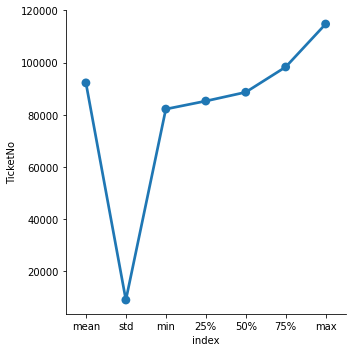

C:\Users\44775\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


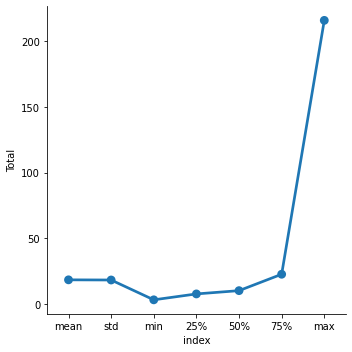

C:\Users\44775\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


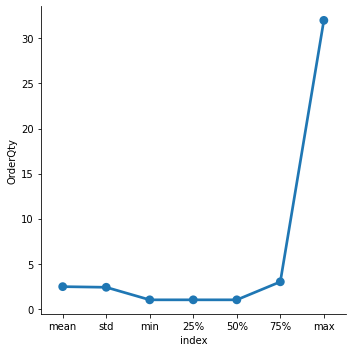

C:\Users\44775\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


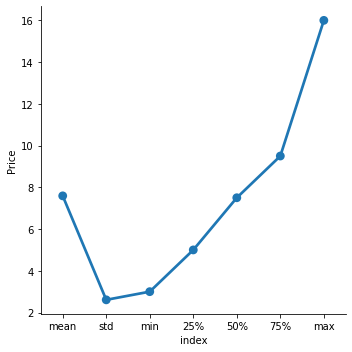

In [62]:
describe_num_df = combined_df.describe()
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.factorplot(x='index', y=i, data=describe_num_df)
  plt.show()

# Plotting Null values in a Dataset
Null values are missing values from the dataset

In [38]:
null_df = combined_df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_df)

               count
SaleDate           0
TicketNo           0
Outlet             0
Total              0
OrderQty           0
Stock_Code         0
Name               0
Description    10951
Price              0
Product_Group      0
Group_name         0
CardType           0


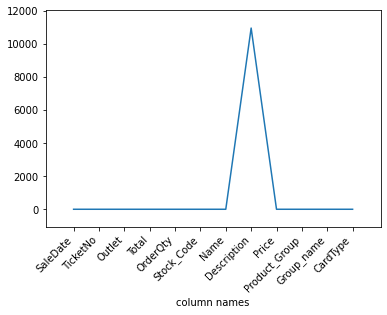

In [39]:
plt.plot(null_df.index, null_df['count'])
plt.xticks(null_df.index, null_df.index, rotation=45,
horizontalalignment='right')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

# Plotting value_counts() function for categorical variables.
The value_counts() function computes a series containing count of unique values. Series is in descending order so that the first element is the most frequent-occurring element. It excludes the null value by default.

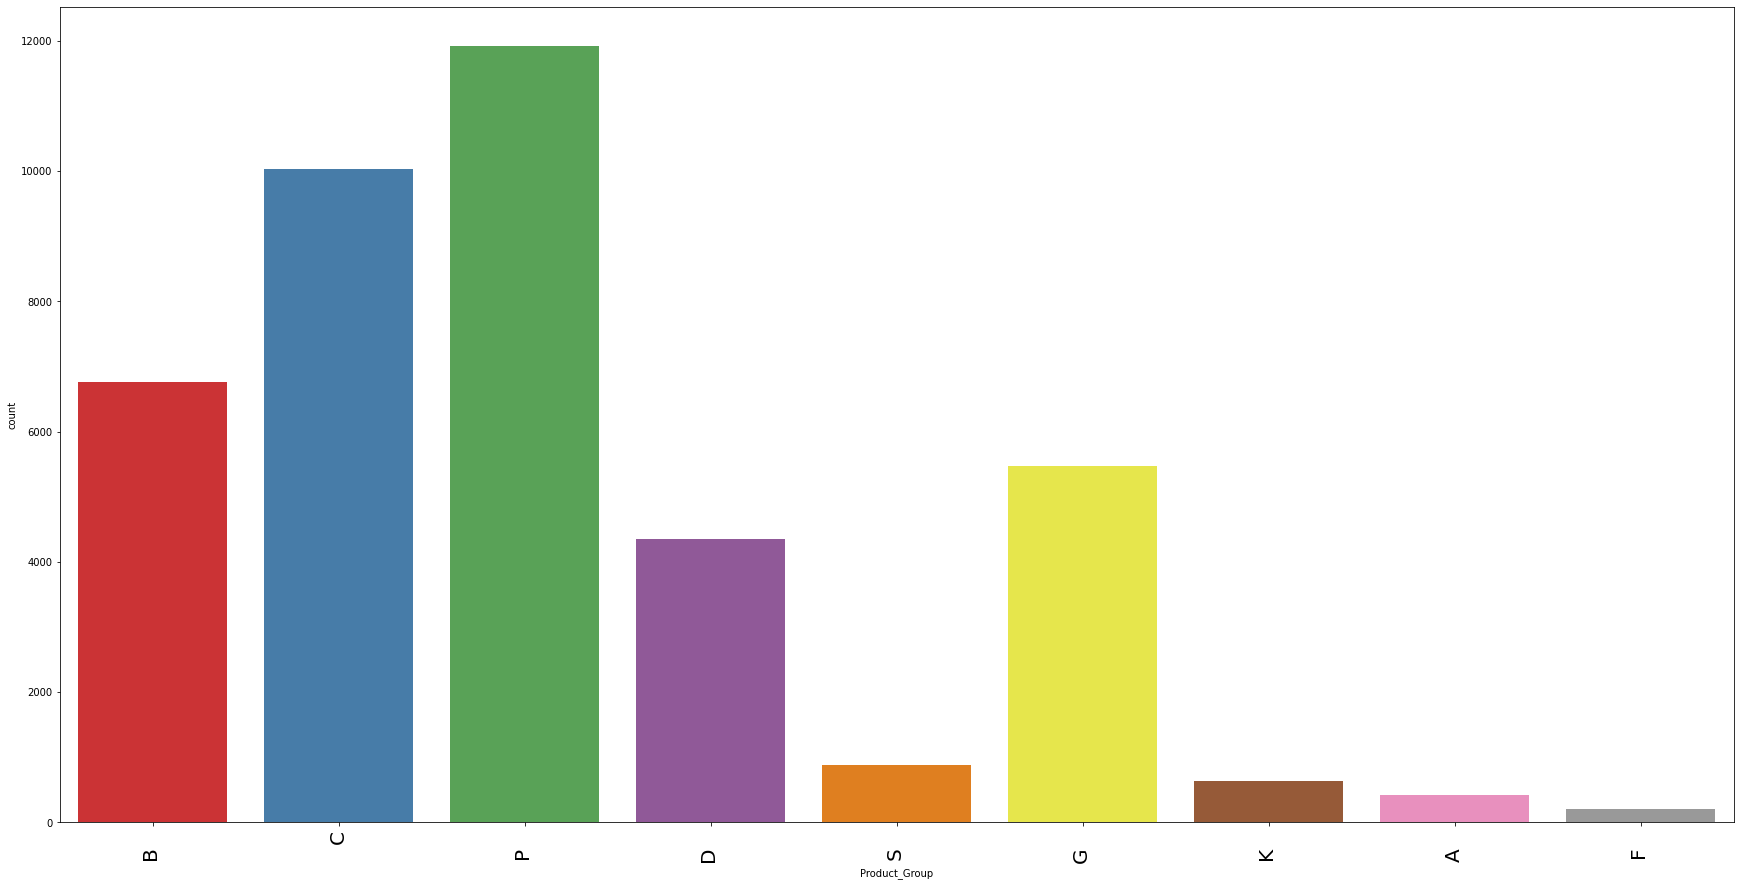

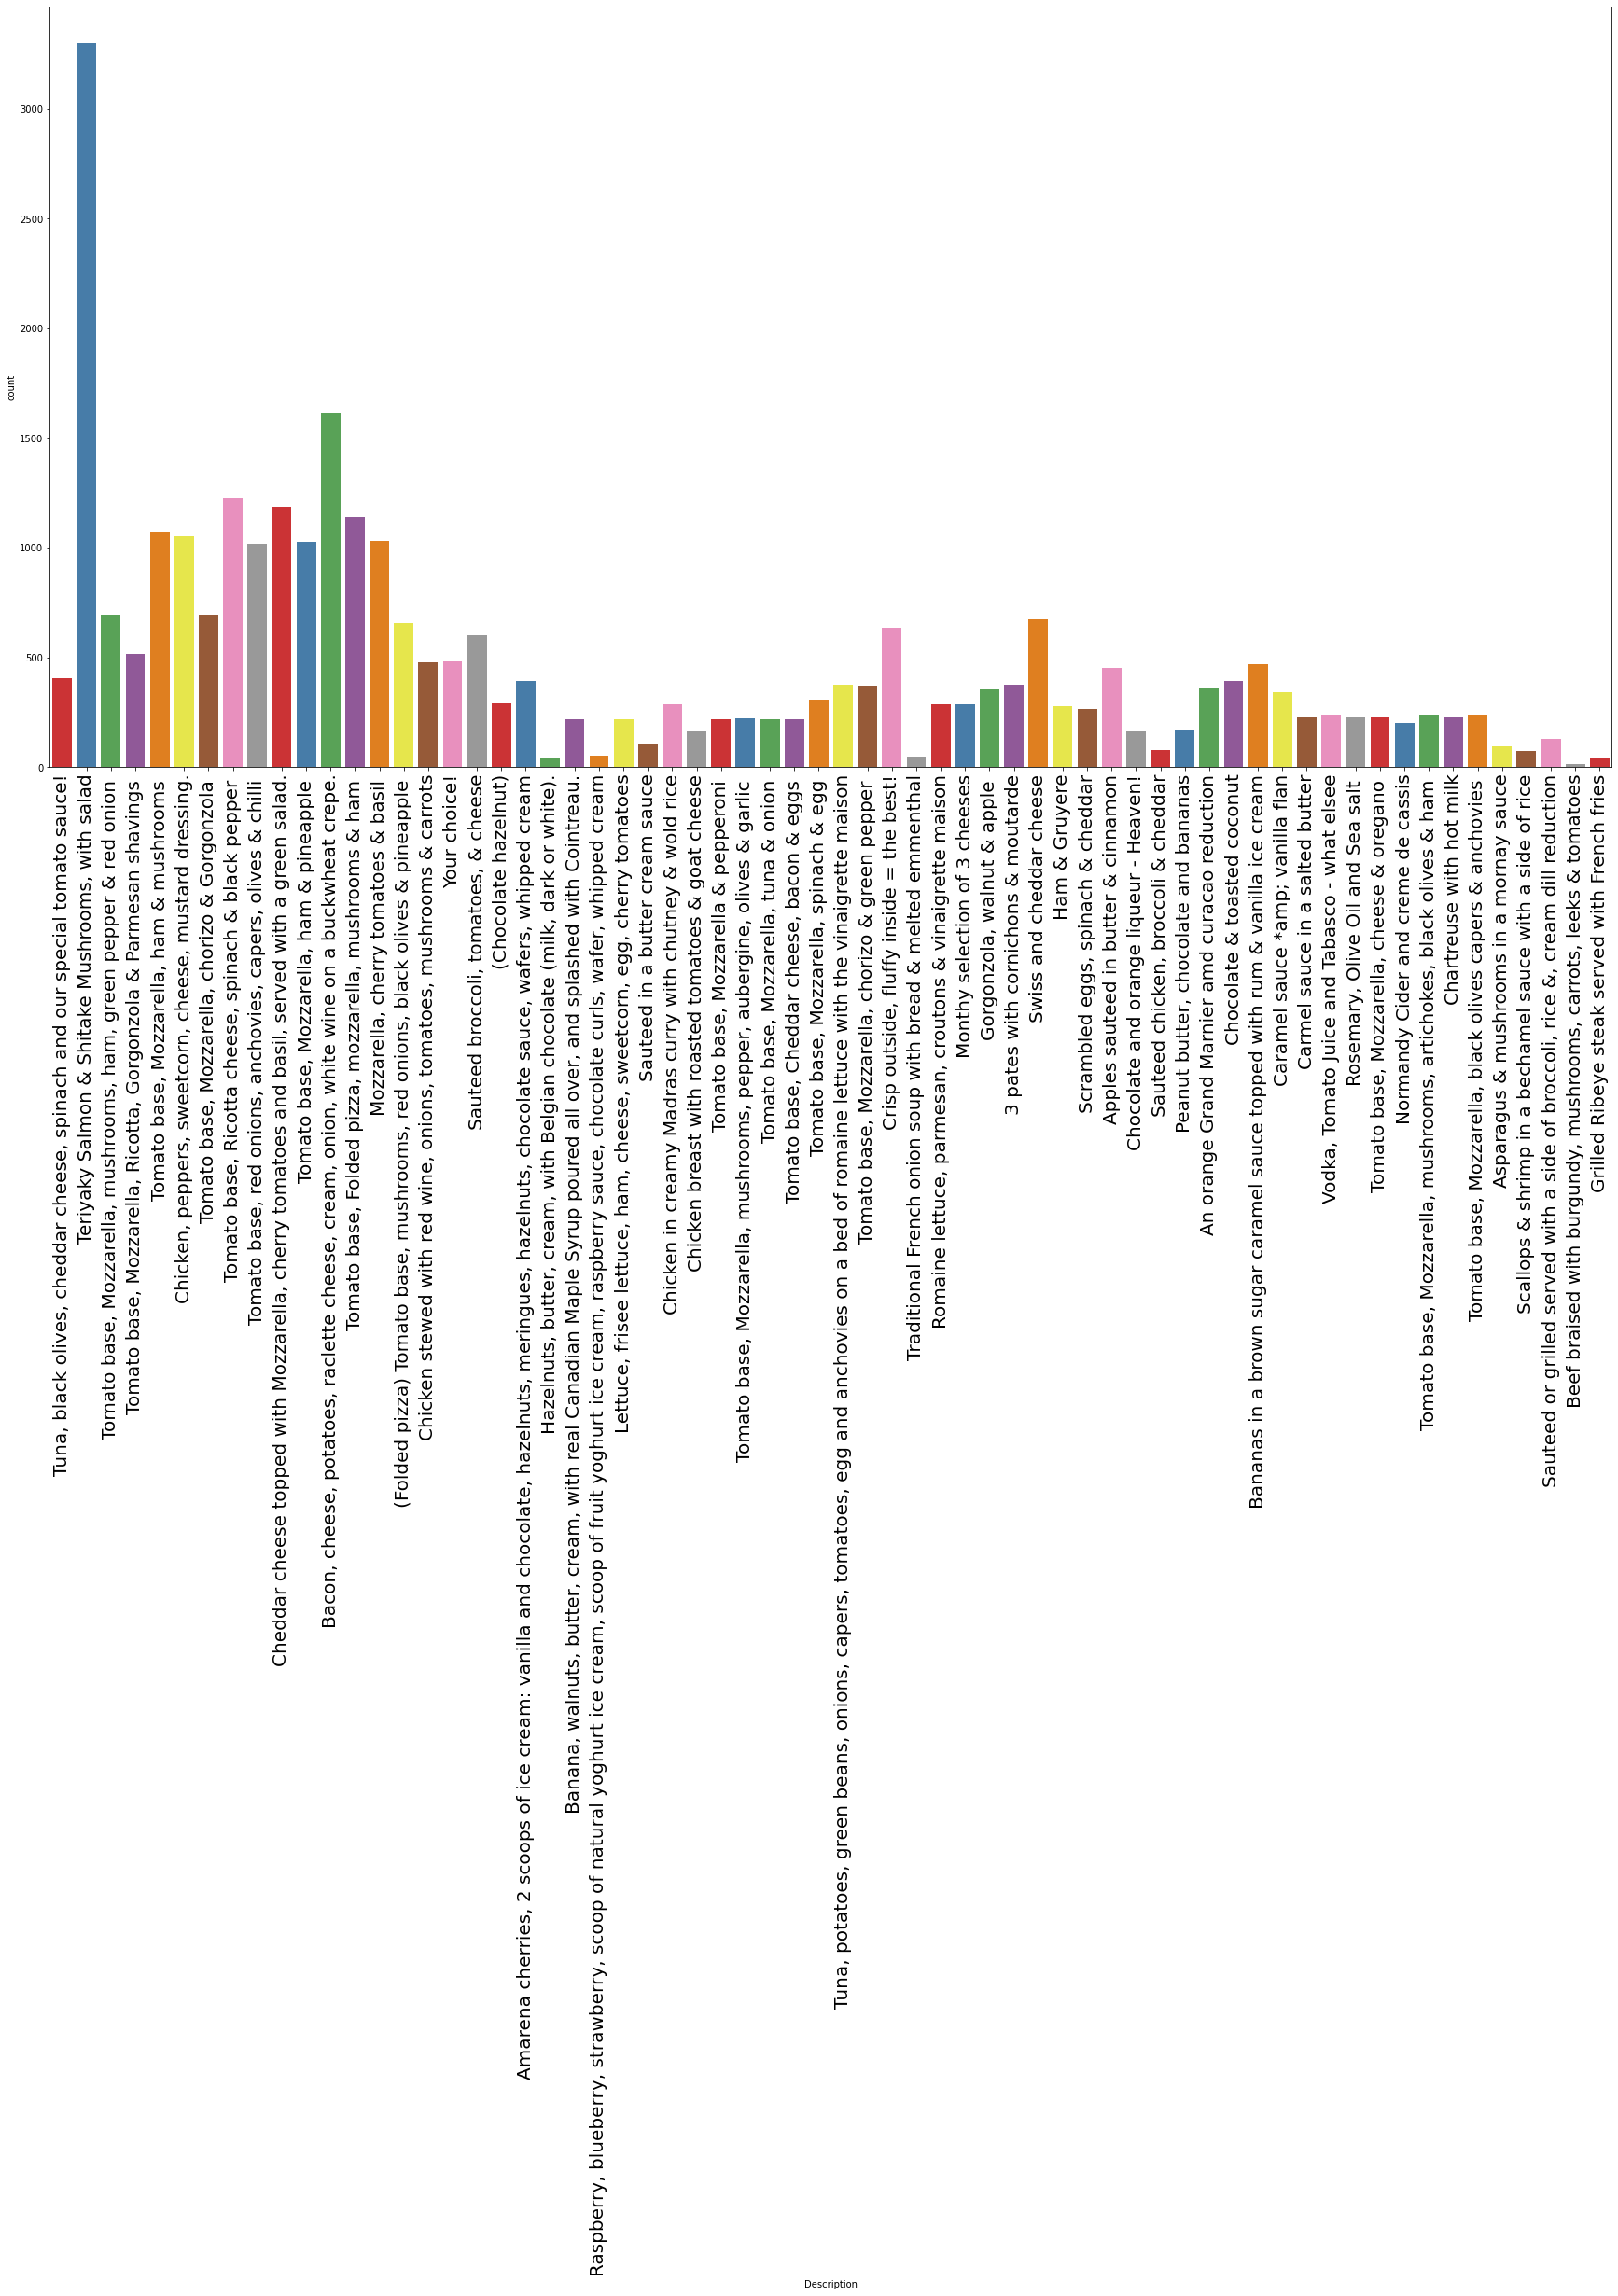

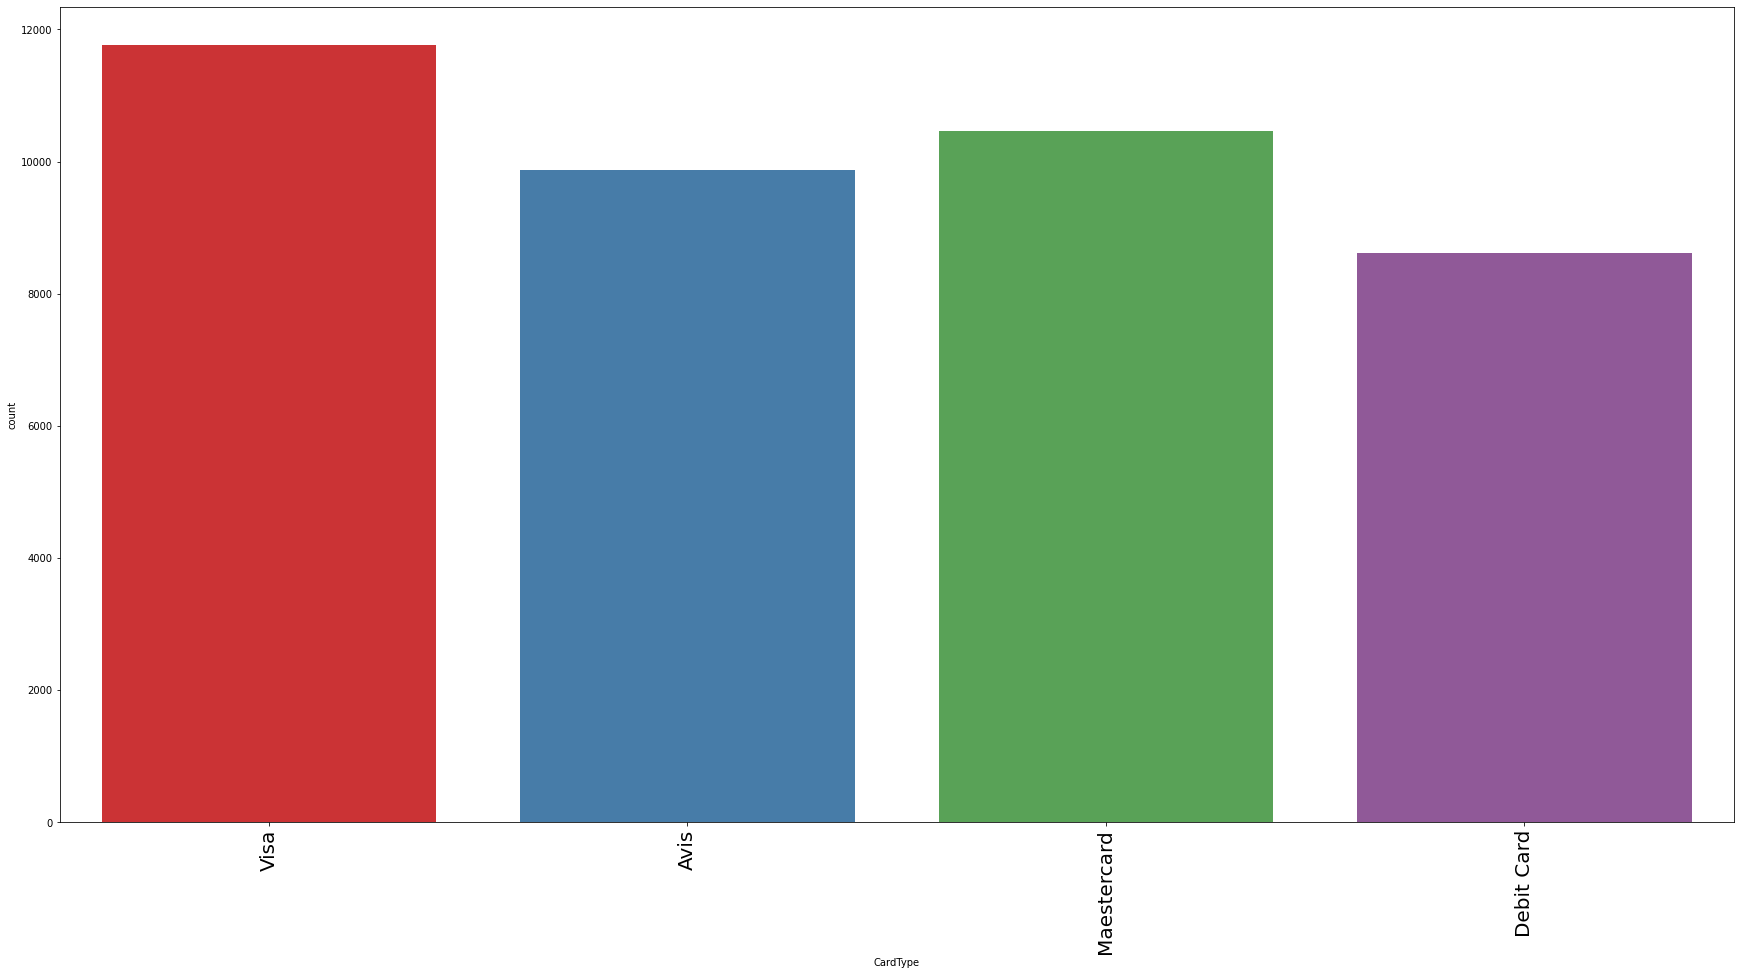

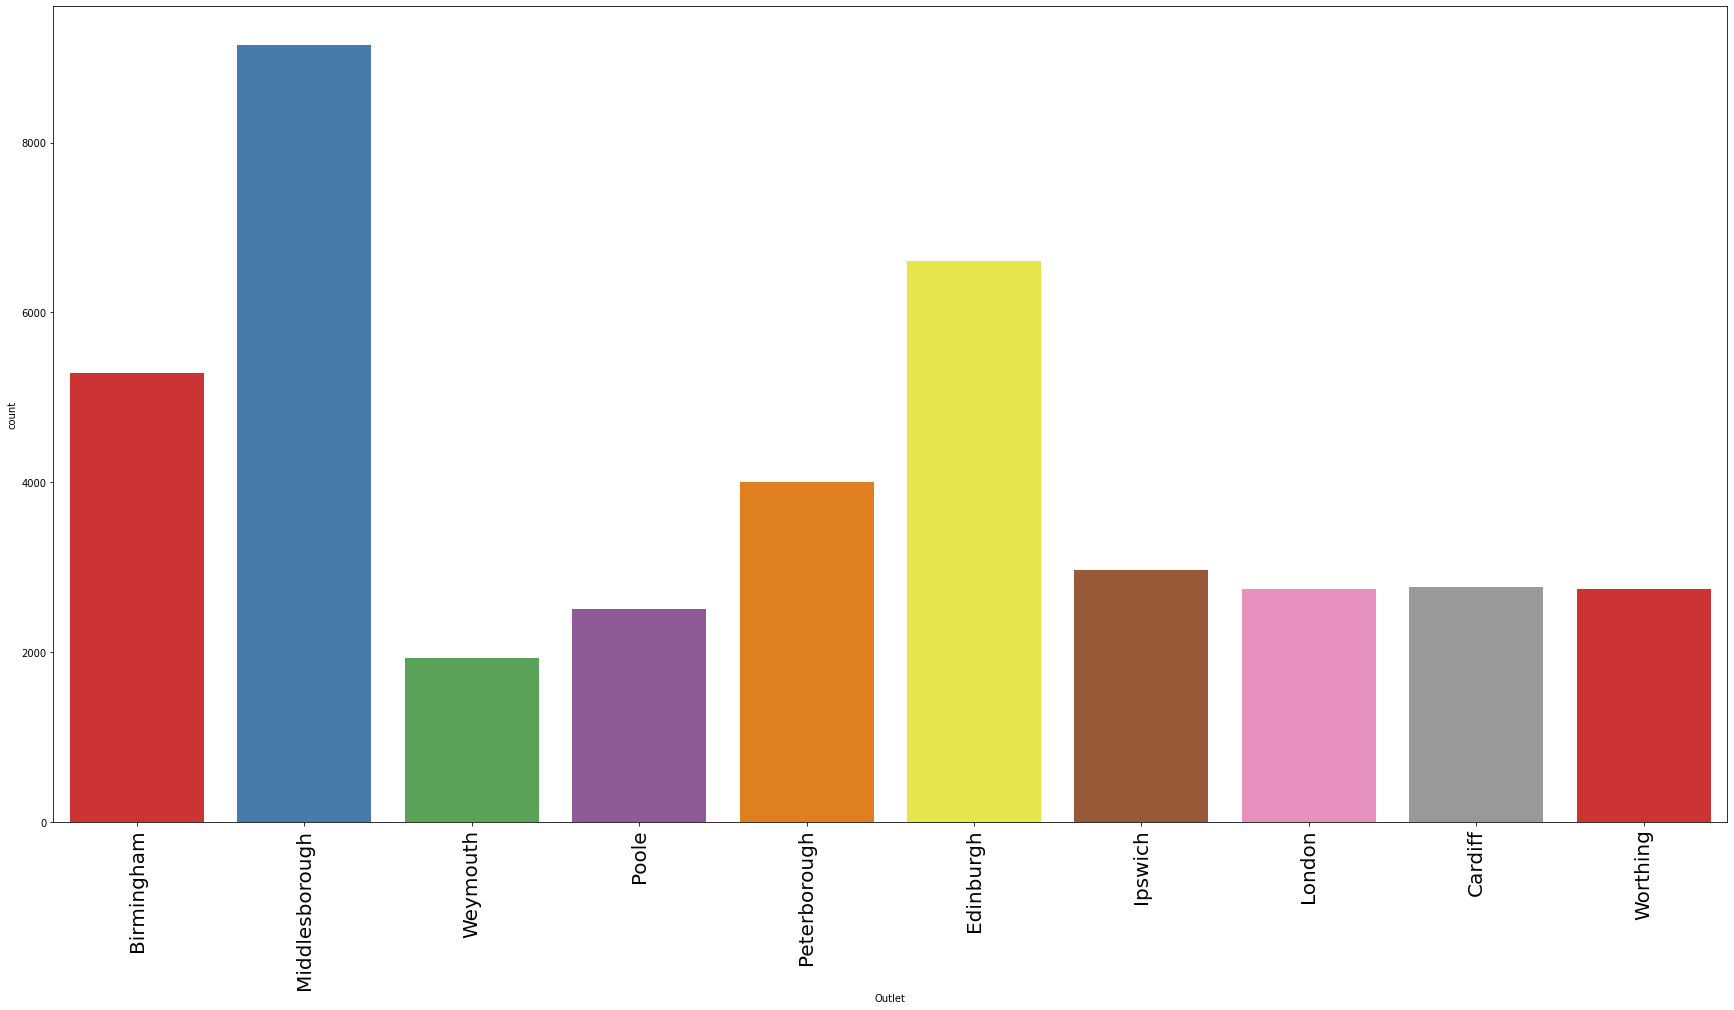

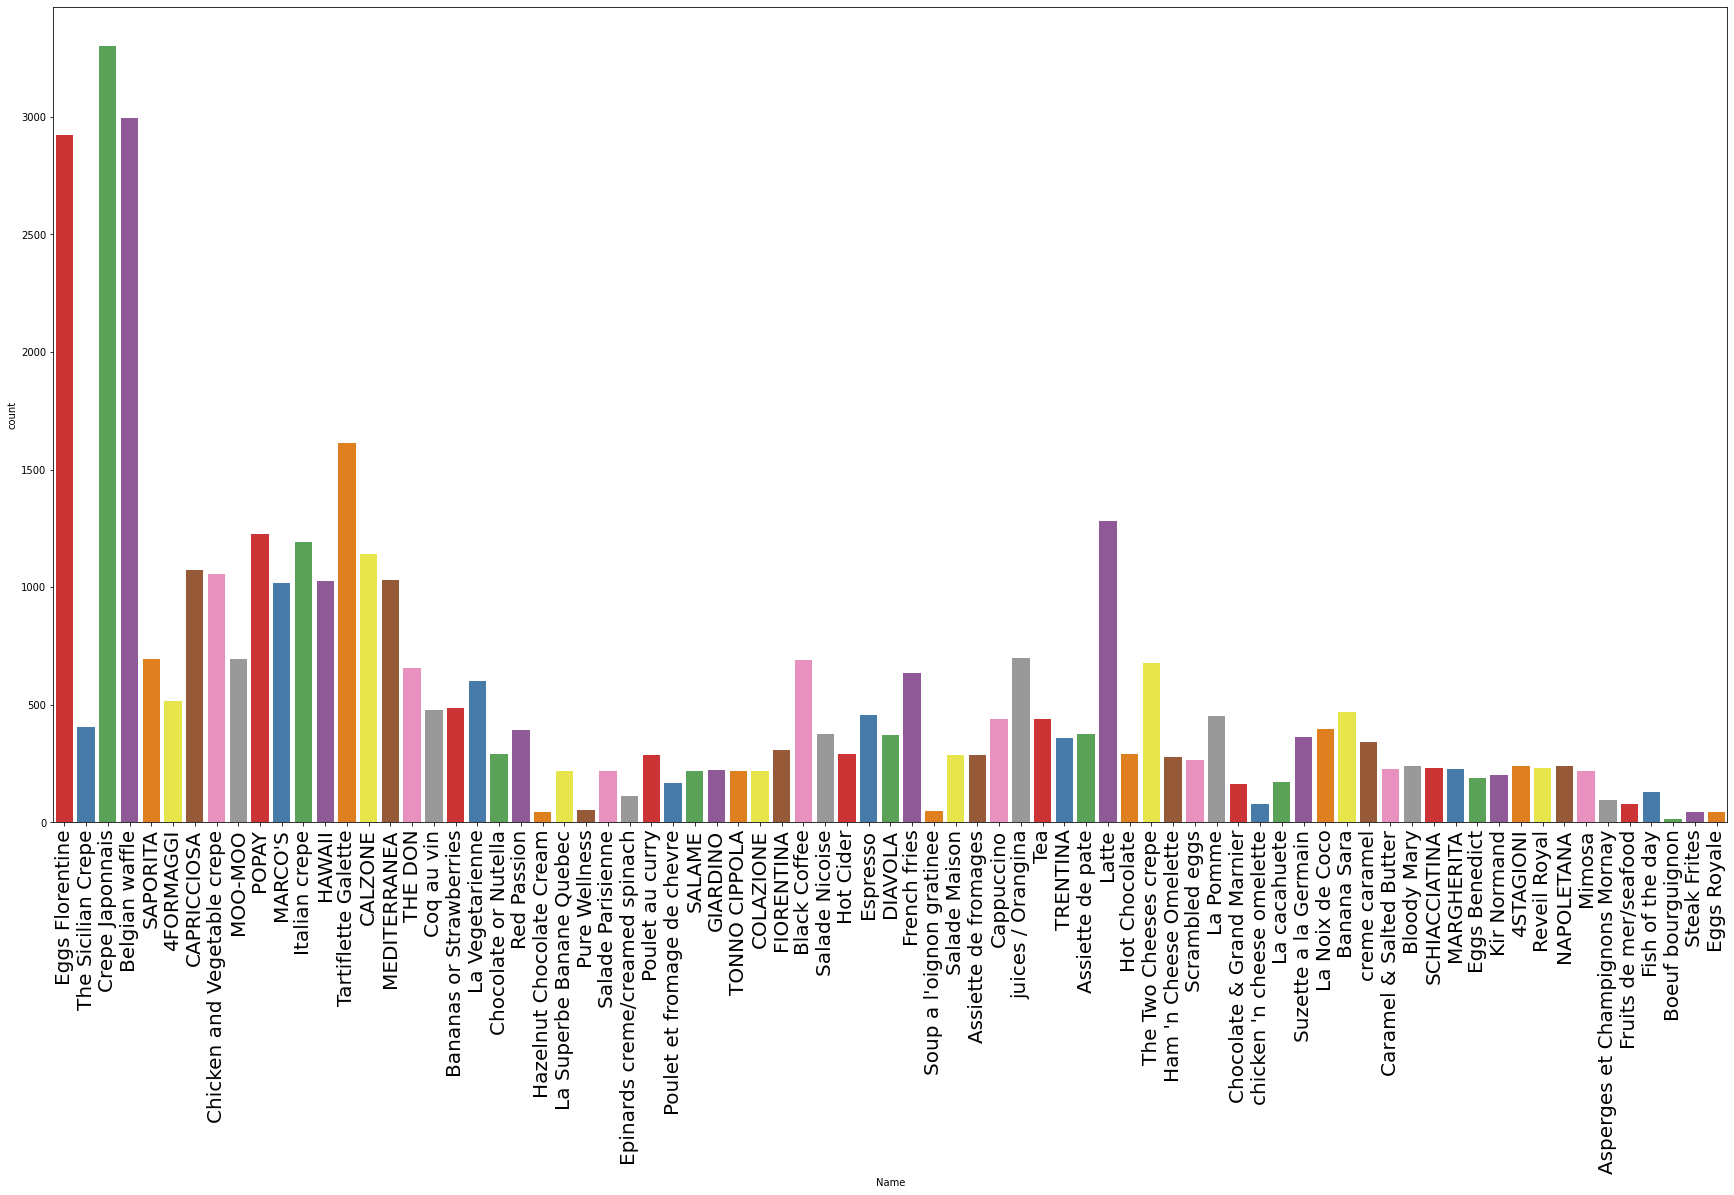

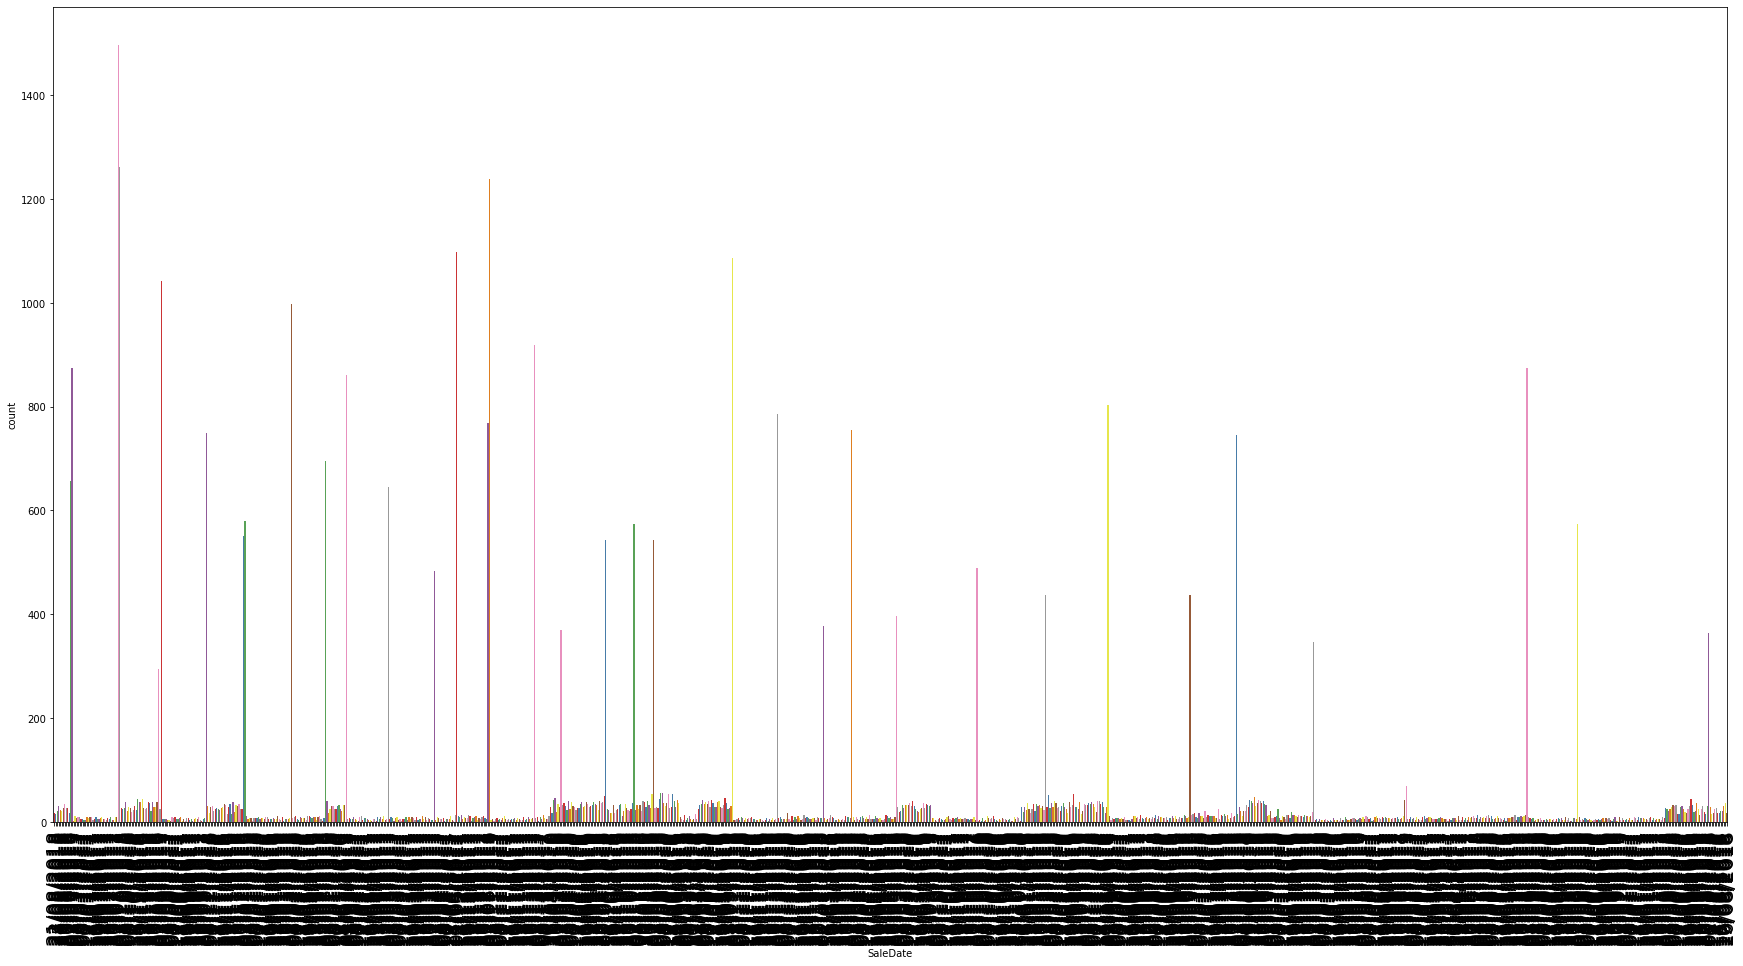

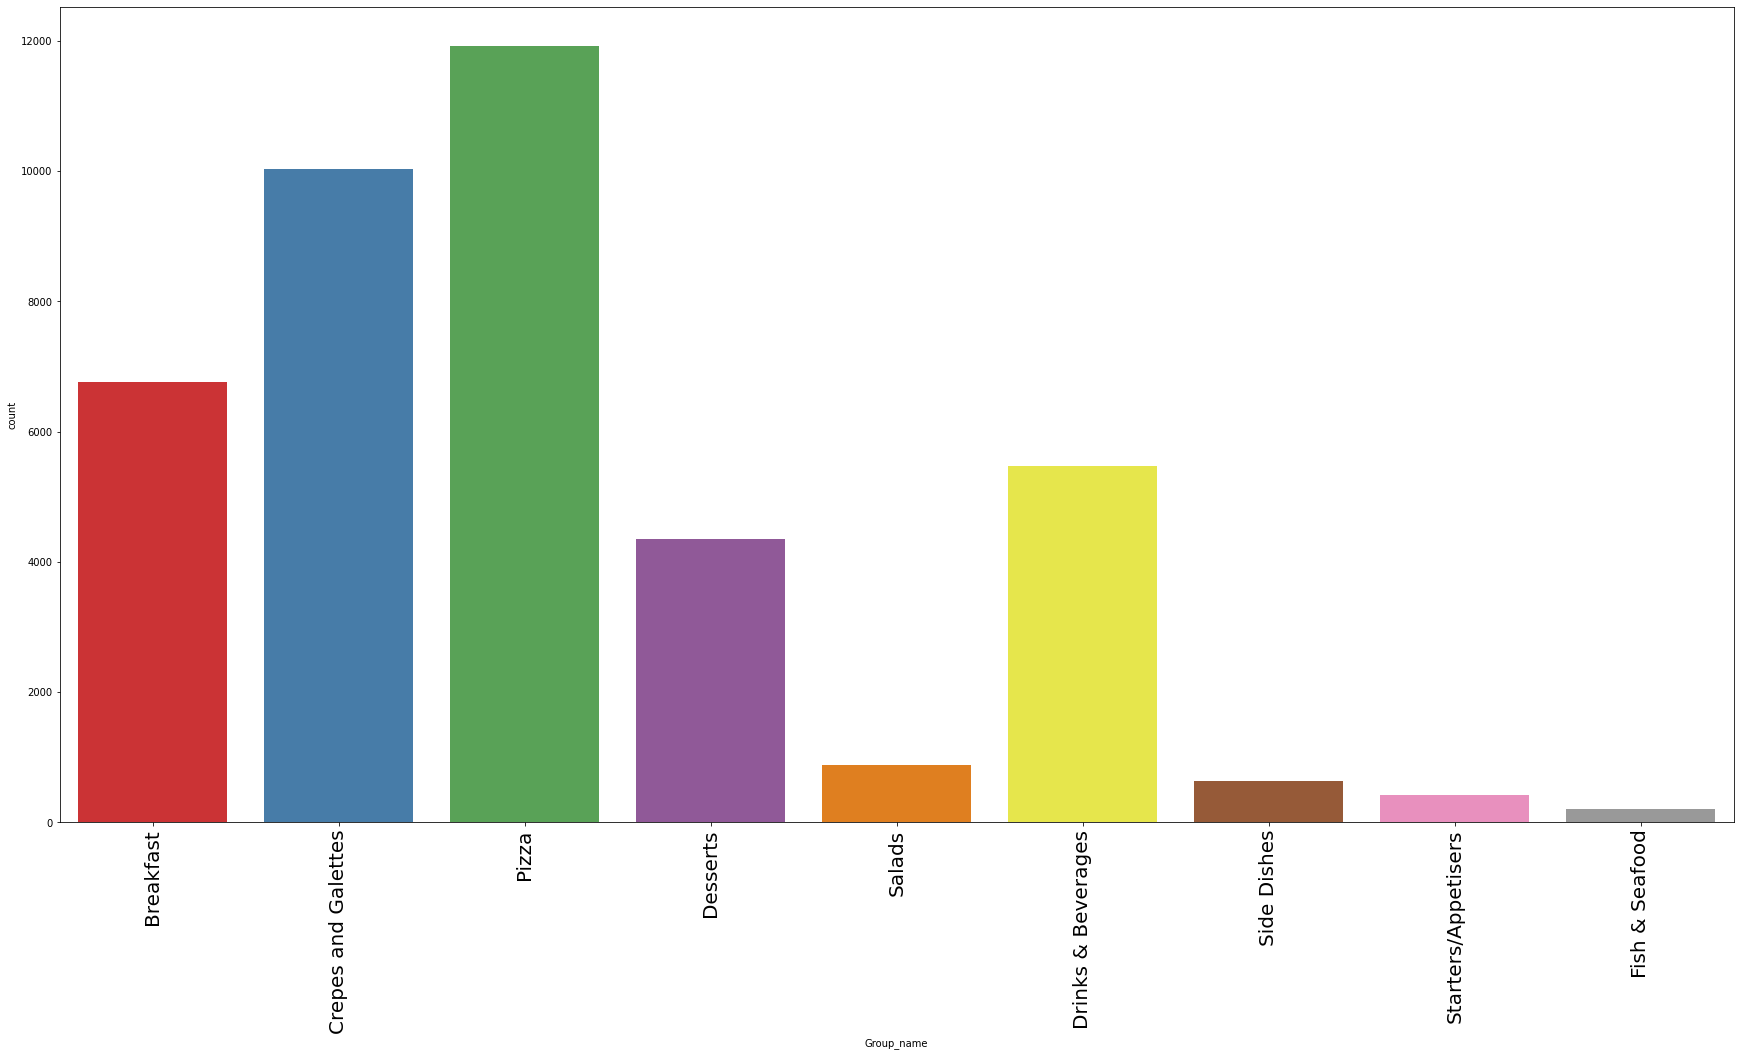

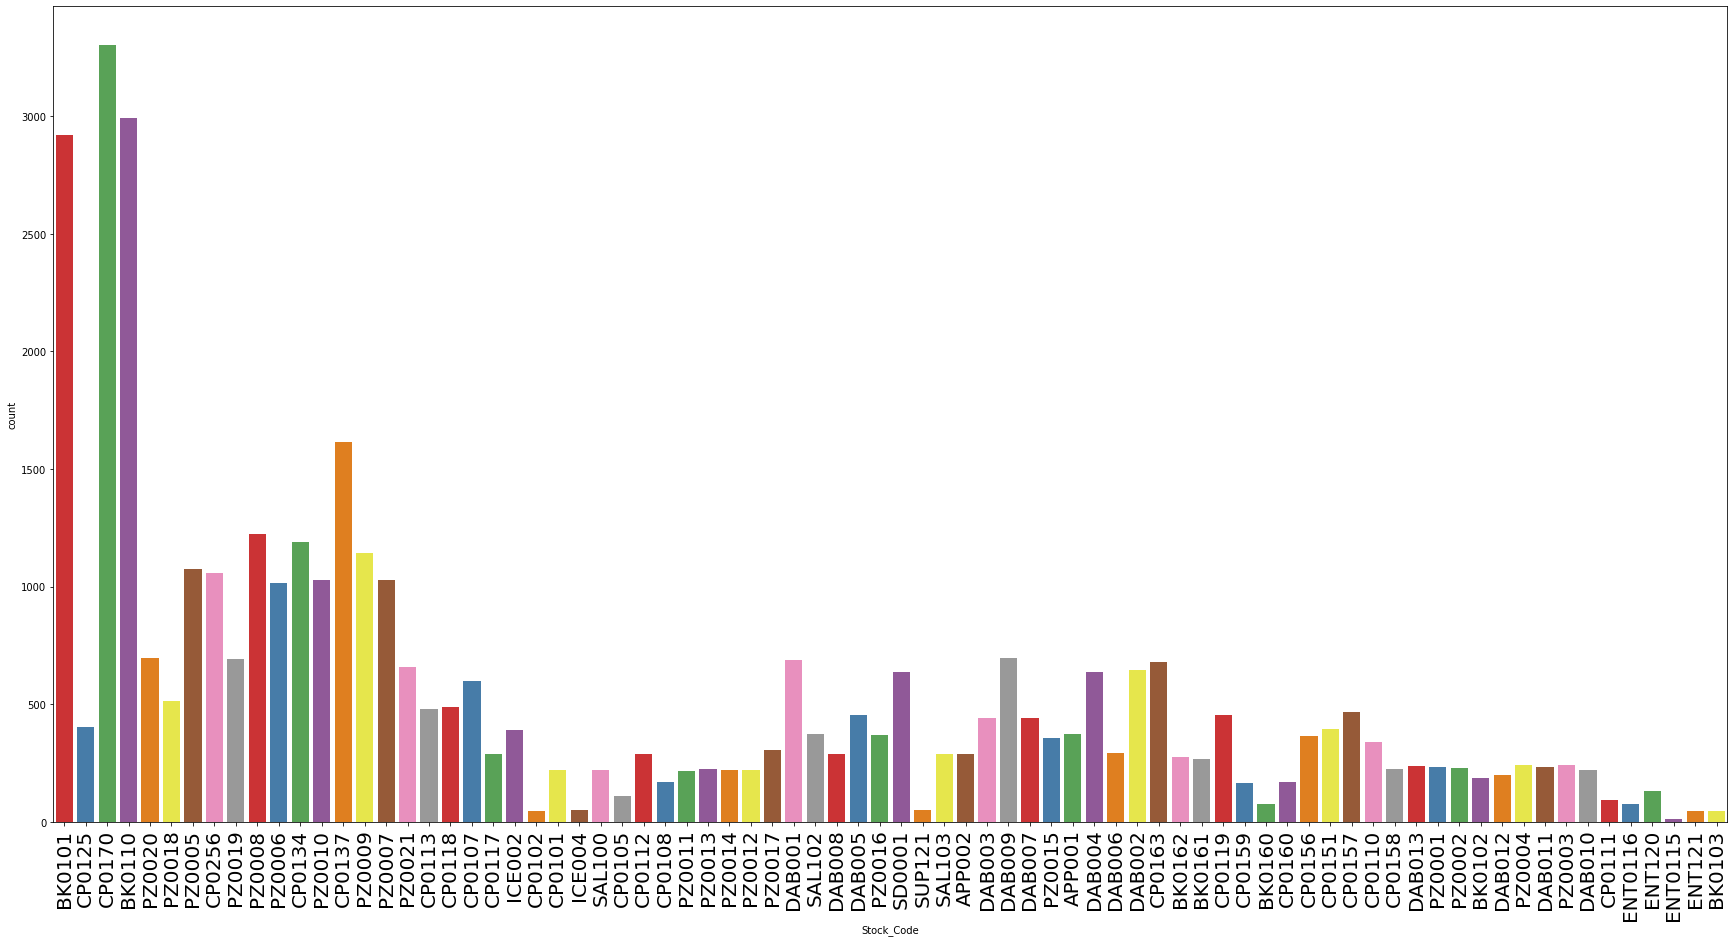

In [69]:
for i in cat_col:
   if i in ['source']:
      continue
   plt.figure(figsize=(30, 15))
   chart = sns.countplot(
   data=combined_df[cat_col],
   x=i,
   palette='Set1'
 )
   chart.set_xticklabels(chart.get_xticklabels(),fontsize=20, rotation=90)
   plt.show()

# Plotting value_counts for numerical variables.
It’s not advisable to use value_counts function for numerical variables. But if you do, use it with pandas filter function or seaborn inbuilt function.

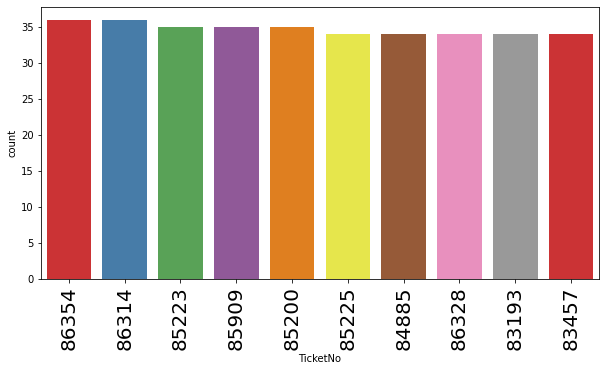

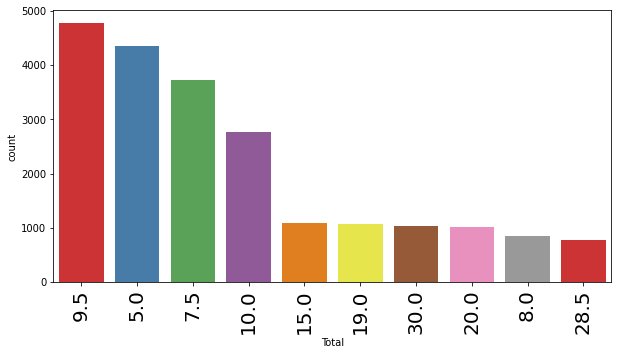

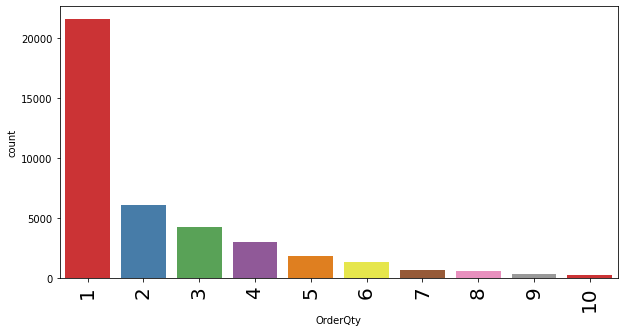

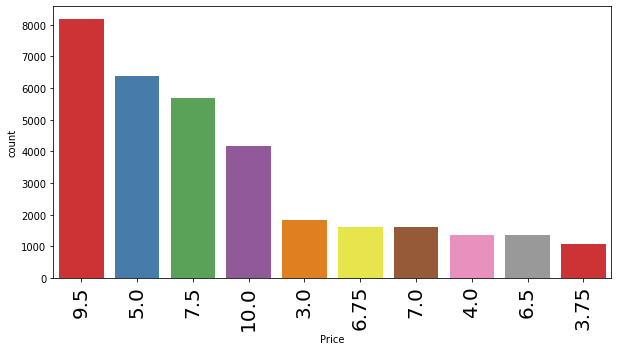

In [45]:
for i in num_col:
   if i in ['source']:
     continue
   plt.figure(figsize=(10, 5))
   chart = sns.countplot(
             data=combined_df,
             x=i,
             palette='Set1',
# This option plot top category of numerical values.
             order=pd.value_counts(combined_df[i]).iloc[:10].index
           )
   chart.set_xticklabels(chart.get_xticklabels(),fontsize=20, rotation=90)
   plt.show()

# Plotting of skew() and kurt() function.
The skew() function used to calculate skewness in data. It represents the shape of the distribution. Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.

The kurt() function used to calculate kurtosis in data. Kurtosis is the measure of thickness or heaviness of the distribution. It represents the height of the distribution.

In [47]:
skew = {}
kurt = {}
for i in num_col:
# to skip columns for plotting
   if i in ['num_orders']:
       continue
   skew[i] = combined_df[i].skew()
   kurt[i] = combined_df[i].kurt()
print(skew)








{'TicketNo': 0.9703849899447519, 'Total': 2.460007549906649, 'OrderQty': 2.7521543187894357, 'Price': 0.04883776640081579}


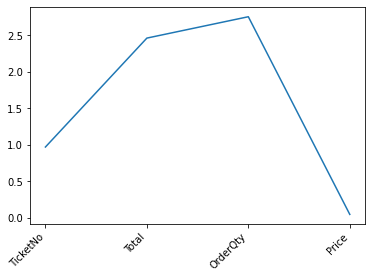

In [49]:
#Skewness value of Columns
plt.plot(list(skew.keys()),list(skew.values()))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()



{'TicketNo': -0.33291711868184715, 'Total': 8.322106322851726, 'OrderQty': 11.314983814583655, 'Price': -0.66770492950238}


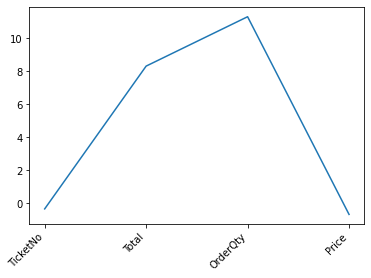

In [52]:
#Skewness value plot
print(kurt)

#Kurtosis value of columns
plt.plot(list(kurt.keys()),list(kurt.values()))
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()



# Kurtosis value plot
Plotting of corr() function.
The corr() used to find the pairwise correlation of all columns in the dataframe. Missing values excluded in the calculation. Correlation uncovers the complex and unknown relationships between the variables in the dataset. The most common and default correlation coefficient is Pearson’s correlation coefficient.



In [56]:
corrmat = combined_df.corr()
print(corrmat)



          TicketNo     Total  OrderQty     Price
TicketNo  1.000000 -0.142329 -0.157054 -0.039817
Total    -0.142329  1.000000  0.886601  0.283321
OrderQty -0.157054  0.886601  1.000000 -0.073242
Price    -0.039817  0.283321 -0.073242  1.000000


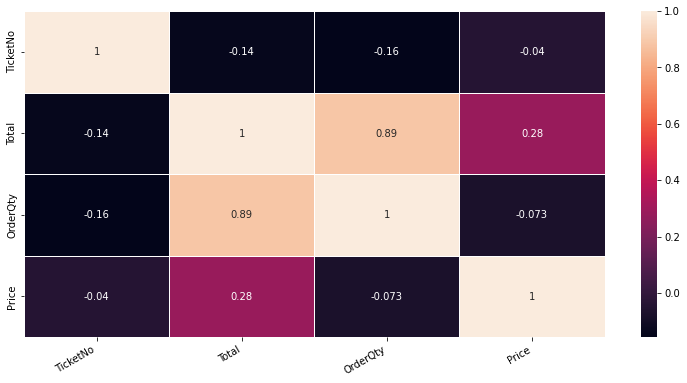

In [59]:
#Correlation between columns
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

